# Image Classification of 70 Dog Breeds Using Convolutional Neural Networks (CNN)

Mentor: Eva Theresia Pardede

Mentee: Zalfa Zahirah

## Problem Definition

Building a CNN-based deep learning machine learning model to automatically and accurately classify dog images into 70 different breed categories.

## Import library

In [ ]:
import os
import gdown
import random
import zipfile
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout


## Data Collection

### Data Collection

At the data collection stage, a public dataset titled "70 Dog Breeds - Image Data Set" from the Kaggle platform was used. This dataset provides images of 70 dog breeds divided into three subsets: train, validation, and test, with a total of approximately 8,000 images.

https://www.kaggle.com/datasets/gpiosenka/70-dog-breedsimage-data-set

In [ ]:
!gdown --id 1E--WJBggYffPf0nPX949VsZKzFvEMNpd

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1E--WJBggYffPf0nPX949VsZKzFvEMNpd
From (redirected): https://drive.google.com/uc?id=1E--WJBggYffPf0nPX949VsZKzFvEMNpd&confirm=t&uuid=ff7fc49e-fa41-4c58-8243-f883e5f5d192
To: /content/dogdataset.zip
100% 225M/225M [00:03<00:00, 74.0MB/s]


In [ ]:
# Path of downloaded ZIP file
zip_path = "/content/dogdataset.zip"

# Extraction destination folder path
extract_path = "/content/dogdataset"

# Ektraction file
if zip_path.endswith(".zip"):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"The dataset was successfully extracted to {extract_path}")

The dataset was successfully extracted to /content/dogdataset


In [ ]:
train_dir = '/content/dogdataset/train'
valid_dir = '/content/dogdataset/valid'
test_dir = '/content/dogdataset/test'

## Data Preprocessing

### Data Preprocessing

1. Image Normalization

  All image pixels are converted from a scale of 0–255 to 0–1 with rescale=1./255.
2. Augmentation for Training Data
- horizontal_flip
- rango_de_rotación=20
- rango_de_desplazamiento_ancho=0.1
- rango_de_desplazamiento_vertical=0.1
- zoom_range=0.2
3. Image Size

  All images are resized to 128 x 128 pixels.
4. Pemrosesan Batch

  Images are processed in batches of 64 images at a time.


In [ ]:
# Image augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2
)

test_valid_datagen = ImageDataGenerator(rescale=1./255)

def load_data(datagen, directory, shuffle=True):
    return datagen.flow_from_directory(
        directory,
        target_size=(128, 128),
        color_mode='rgb',
        batch_size=64,
        class_mode='categorical',
        shuffle=shuffle
    )

# Load datasets
train_data = load_data(train_datagen, train_dir, shuffle=True)
valid_data = load_data(test_valid_datagen, valid_dir, shuffle=False)
test_data  = load_data(test_valid_datagen, test_dir, shuffle=False)



Found 7946 images belonging to 70 classes.
Found 700 images belonging to 70 classes.
Found 700 images belonging to 70 classes.


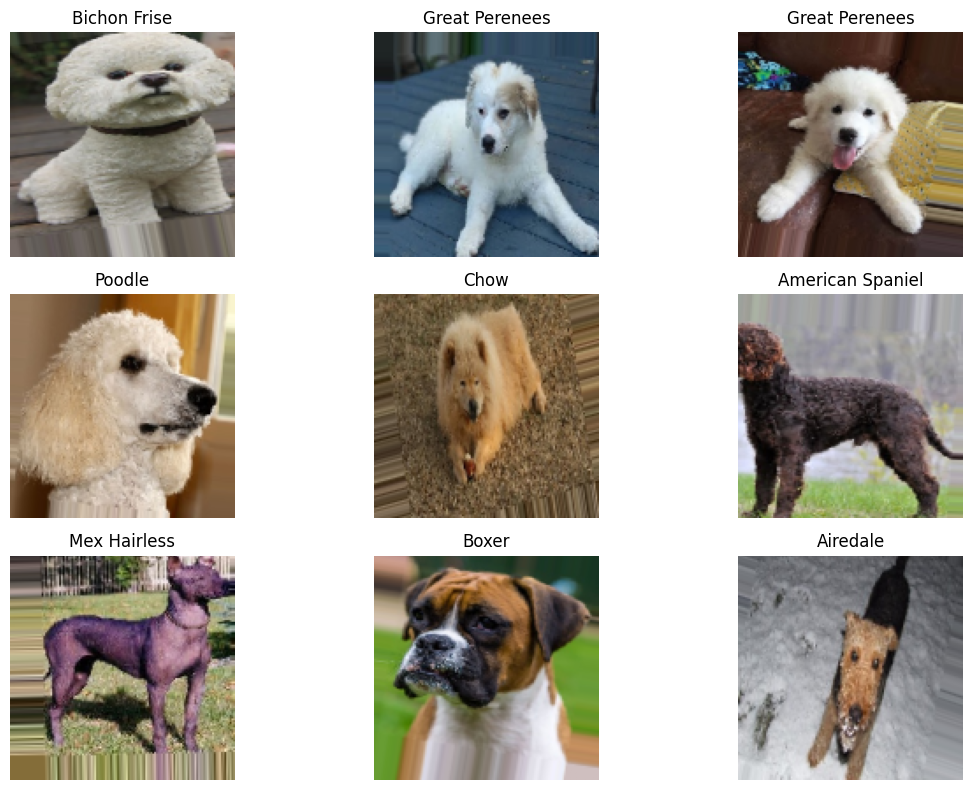

In [ ]:
# Ambil 1 batch (default 32 gambar)
images, labels = next(train_data)

# Ambil mapping dari index ke nama kelas
class_mapping = {v: k for k, v in train_data.class_indices.items()}

# Tampilkan 9 gambar pertama
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    label_index = np.argmax(labels[i])  # ambil indeks label
    plt.title(class_mapping[label_index])  # tampilkan nama label
    plt.axis('off')
plt.tight_layout()
plt.show()


## Model Building

### Model Building

1. Use Sequential model
2. Use Convolutional blocks (32–512) with ReLU
3. Add BatchNormalization and MaxPooling
4. Use Global Average Pooling
5. Use Dense layer with ReLU
6. Add Dropout to reduce overfitting
7. Output layer: Dense(70) with softmax

In [ ]:
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 4
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Classifier
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(70, activation='softmax'))

# Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 126, 126, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 61, 61, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 61, 61, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             

 Total params: 4,991,622 (19.04 MB)

 Trainable params: 4,987,782 (19.03 MB)

 Non-trainable params: 3,840 (15.00 KB)